In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import subprocess
plt.ioff()
print(matplotlib.is_interactive())

False


In [2]:
# =================== Define Experiment Name =================== #
exp_name = 'test_mitsuba'
scene_name = 'scenes/planar_scene.xml'

# ================ Define Intrinsic Parameters (Fixed) ================= #
# Field of view 
fov = 36
fovAxis = 'x'
# Camera pixel resolution
x_res = 512
y_res = 512
# Number of laser Spots
num_x_spots = 12
num_y_spots = 12
# Laser spot half-width in pixels (spot_hw * 2 = spot width in pixels)
spot_hw = 1 
numSamples = 16

# ================= Define Extrinsic Parameters ================ #
# Camera Location (world coordinates)
cam_x = 0
cam_y = 0
cam_z = 0
# Camera Lookat position (world coordinates)
look_x = 0
look_y = 0
look_z = 1

# ==================== Simulator Parameters ==================== #
tMin = 1.5 # units in pathlength
tMax = 2.5 # units in pathlength
tRes = 0.1 # units in pathlength

False


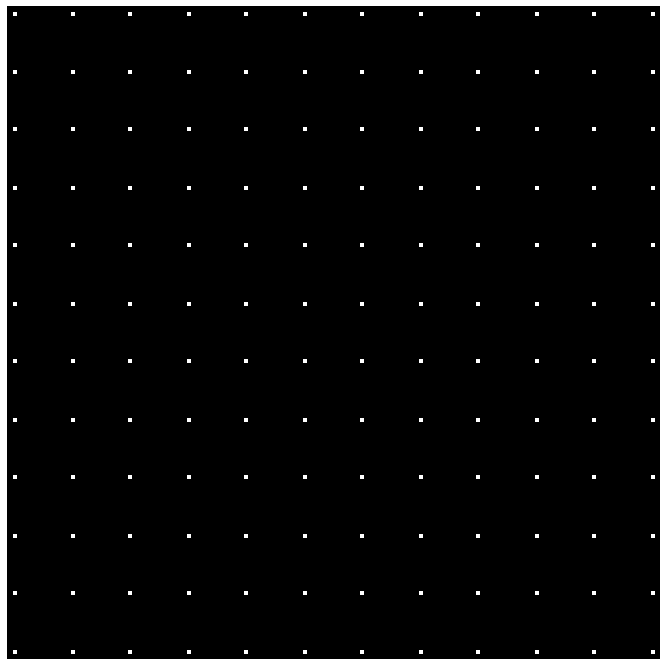

In [9]:
# === Create experiment directory === #
os.mkdir(exp_name)

# === Compute projector image === #
x_locs = np.linspace(spot_hw + 5, x_res-5-spot_hw, num_x_spots)
y_locs = np.linspace(spot_hw + 5, y_res-5-spot_hw, num_y_spots)
grid_x, grid_y = np.meshgrid(x_locs, y_locs, indexing='xy')

proj_img = np.zeros((y_res, x_res))
for ix in range(num_x_spots):
    for iy in range(num_y_spots):
        idx_y = int(grid_y[iy, ix])
        idx_x = int(grid_x[iy, ix])
        proj_img[idx_y-spot_hw:idx_y+spot_hw+1, idx_x-spot_hw:idx_x+spot_hw+1] = 1

plt.figure(figsize=(12, 12), frameon=False)
plt.imshow(proj_img, interpolation='none', cmap='gray')
plt.axis('off')
proj_img_dir = os.path.join(exp_name, 'proj_img.png')
plt.savefig(proj_img_dir, bbox_inches='tight', pad_inches=0)

In [ ]:
# === Run Mitsuba on defined scene and camera parameters === #
output_dir = os.path.join(exp_name, 'output.exr')
subprocess.call(f'mitsuba camera.xml ' # .xml file for all experiments
                f'-D fov={fov} -D fovAxis={fovAxis} ' 
                f'-D cam_x={cam_x} -D cam_y={cam_y} -D cam_z={cam_z} ' 
                f'-D look_x={look_z} -D look_y={look_y} -D look_z={look_z} ' 
                f'-D numSamples={numSamples} '
                f'-D x_res={x_res} -D y_res={y_res} '
                f'-D tMin={tMin} -D tMax={tMax} -D tRes={tRes} '
                f'-D proj_img={proj_img_dir} '
                f'-D scene={scene_name} '
                f'-o {output_dir} ' # file and directory to save to
                f'-q -j 10', # quiet mode, simultaneously schedule several scenes
                shell=True)

print(f'Saving files to {exp_name}')

In [ ]:
idx = 500
idx2 = 454
print(proj_img[idx:idx+10, idx2:idx2+10])